In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()

True

In [2]:

llm = ChatGroq(
    model="deepseek-r1-distill-llama-70b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2,
    # other params...
)

In [13]:
# define the state type

class BlogsState(TypedDict):
    title: str
    outline: str
    content: str
    evaluation: str

In [14]:
# graph define 

graph = StateGraph(BlogsState)

In [15]:
def create_outline(state: BlogsState) -> BlogsState:
    messages = [
        ("system", "You are a helpful assistant that creates outlines for blog posts."),
        ("human", f"Create an outline for a blog post titled '{state['title']}'"),
    ]

    ai_msg = llm.invoke(messages)

    state['outline'] = ai_msg.content
    
    return state

In [16]:
def write_content(state: BlogsState) -> BlogsState:
    messages = [
        ("system", "You are a helpful assistant that writes blog content based on an outline."),
        ("human", f"Write a blog post based on the following outline: {state['outline']}"),
    ]

    ai_msg = llm.invoke(messages)

    state['content'] = ai_msg.content
    
    return state

In [17]:
def evaluate_content(state: BlogsState) -> BlogsState:
    messages = [
        ("system", "You are a helpful assistant that evaluates blog content."),
        ("human", f"Evaluate the following blog content: {state['content']}"),
    ]

    ai_msg = llm.invoke(messages)

    state['evaluation'] = ai_msg.content
    
    return state

In [18]:
# define nodes 

graph.add_node("create_outline",create_outline)
graph.add_node("write_content",write_content)
graph.add_node("evaluate_content", evaluate_content)


# define edges
graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","write_content")
graph.add_edge("write_content","evaluate_content")
graph.add_edge("evaluate_content",END)

# create the workflow

workflow = graph.compile()

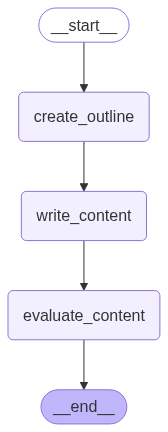

In [19]:
graph.compile()

In [20]:
# execute the graph

initial_state = {'title': 'Is women is safe in India?'}
final_state = workflow.invoke(initial_state)

print(final_state)


{'title': 'Is women is safe in India?', 'outline': '**Blog Post Outline: "Is Women Safe in India?"**\n\n---\n\n**I. Introduction**\n   - Highlight the relevance and importance of the topic.\n   - Introduce India\'s contradictions as a modern nation with traditional values.\n   - State the purpose: to explore the complexities of women\'s safety in India.\n\n**II. Current State of Women\'s Safety in India**\n   - Present statistics on crime rates against women (rape, domestic violence).\n   - Discuss high-profile cases (e.g., Nirbhaya) and their societal impact.\n   - Mention public and governmental responses to these issues.\n\n**III. Cultural and Societal Factors**\n   - Explore the influence of patriarchy on attitudes and behaviors.\n   - Address victim-blaming and its implications.\n   - Discuss the role of education and economic independence in empowerment.\n\n**IV. Legal Frameworks and Challenges**\n   - Outline key laws protecting women (Criminal Law Amendment Act, etc.).\n   - Di

In [21]:
print(final_state['outline'])

**Blog Post Outline: "Is Women Safe in India?"**

---

**I. Introduction**
   - Highlight the relevance and importance of the topic.
   - Introduce India's contradictions as a modern nation with traditional values.
   - State the purpose: to explore the complexities of women's safety in India.

**II. Current State of Women's Safety in India**
   - Present statistics on crime rates against women (rape, domestic violence).
   - Discuss high-profile cases (e.g., Nirbhaya) and their societal impact.
   - Mention public and governmental responses to these issues.

**III. Cultural and Societal Factors**
   - Explore the influence of patriarchy on attitudes and behaviors.
   - Address victim-blaming and its implications.
   - Discuss the role of education and economic independence in empowerment.

**IV. Legal Frameworks and Challenges**
   - Outline key laws protecting women (Criminal Law Amendment Act, etc.).
   - Discuss enforcement challenges (corruption, awareness issues).

**V. Infrastru

In [22]:
print(final_state['evaluation'])

**Evaluation of the Blog Post: "Is Women Safe in India?"**

**Structure and Content:**
The blog is well-organized, starting with an introduction that sets the context by highlighting the contrast between modernity and tradition in India. It effectively transitions through various sections, each addressing a different facet of women's safety, from current statistics to legal frameworks and grassroots initiatives. The conclusion provides a hopeful outlook, emphasizing the need for collective action.

**Strengths:**
1. **Comprehensive Approach:** The blog covers a wide range of topics, including cultural factors, legal reforms, infrastructure, education, and grassroots efforts, providing a balanced view of both challenges and progress.
2. **Relevant Examples:** The mention of the Nirbhaya case and the Criminal Law Amendment Act adds credibility and context to the discussion.
3. **Positive Tone:** The conclusion's emphasis on hope and collective action is encouraging and motivational.

**A